In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from diffusers import StableDiffusionPipeline
import torch

2024-08-31 15:30:10.597758: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-31 15:30:10.609970: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 15:30:10.623584: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 15:30:10.627166: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-31 15:30:10.637150: I tensorflow/core/platform/cpu_feature_guar

In [2]:
model_name = "gpt2"
gpt2_model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

/home/lycinthus/Documents/python/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:  33%|###3      | 451M/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:  15%|#5        | 535M/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
def generate_description(prompt):
    input_text = f"Generate a detailed image description based on the following prompt: {prompt}"
    input_ids = tokenizer.encode(input_text, return_tensors="pt")

    output = gpt2_model.generate(
    input_ids,
    max_length=150,
    num_return_sequences=1,
    no_repeat_ngram_size=2,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    temperature=0.7
)

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text.split(":", 1)[-1].strip()


In [8]:
def generate_image(description):
  image = pipe(description).images[0]
  return image

In [11]:
def main():
  user_prompt = input("Enter a prompt for image generation: ")
  print("Generating detailed description...")
  detailed_description = generate_description(user_prompt)
  print(f"Generated description: {detailed_description}")
  print("Generating image...")
  image = generate_image(detailed_description)
  image.save("generated_image.png")
  print("Image saved as 'generated_image.png'")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generating detailed description...


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['be filled with the seeds you selected. be sure to fill in the correct information for each seed you received. if you still have questions, please contact the seed information manager. if you are interested in using the program to seed your own garden or plant a new one, contact me. i']


Generated description: garden of red spider lilies.

Get information about the best available shade and size for the garden. Enter the desired color for your garden, or select the available colors. You will be asked to provide the appropriate color to the seed box. Click OK. When you receive the information you sent, you will receive a notification that you have received your seed. The seedbox will then be filled with the seeds you selected. Be sure to fill in the correct information for each seed you received. If you still have questions, please contact the Seed Information Manager.


If you are interested in using the program to seed your own garden or plant a new one, contact me. I
Generating image...


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as 'generated_image.png'


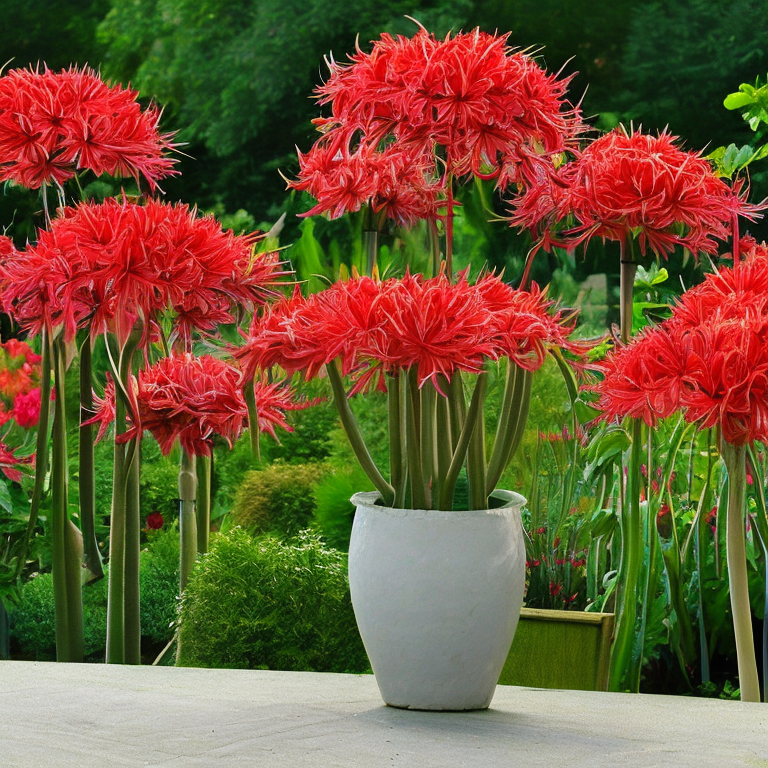

In [14]:
if __name__ == "__main__":
  main()

from IPython.display import Image, display
display(Image("generated_image.png"))
